In [1]:
import sys
from pathlib import Path
import os 
sys.path.append('/home/gridsan/vyuan/.local/lib/python3.9/site-packages/')

current_path = Path.cwd()

# Go to top of the root and append
root = current_path.parents[1]
sys.path.append(str(root))

os.chdir(root)

In [2]:
import pandas as pd
import re
import math
import json
import torch

## APPD

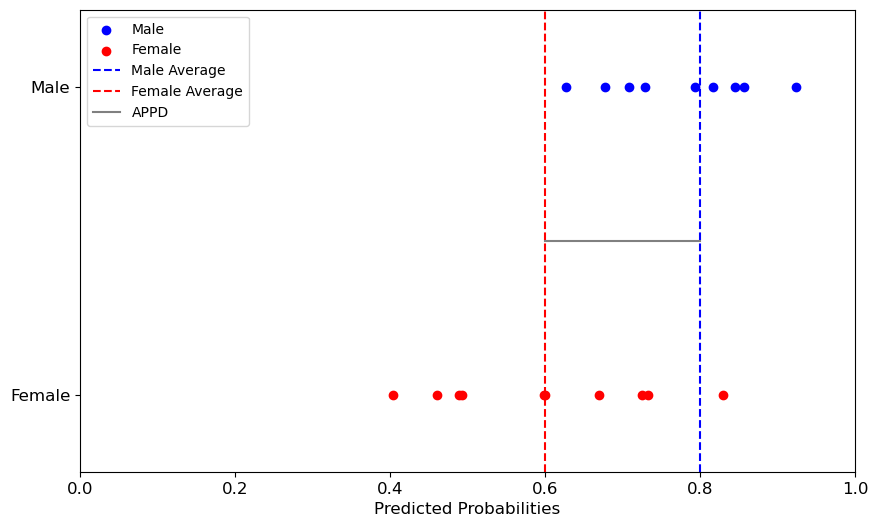

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(1)
male_probabilities = np.random.uniform(0.4, 0.95, 10)
female_probabilities = np.random.uniform(0.4, 0.9, 10)

# Set the average to 0.8 and 0.6
male_probabilities -= np.mean(male_probabilities) - 0.8
female_probabilities -= np.mean(female_probabilities) - 0.6

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(male_probabilities, np.ones(10) * 1.1, color='blue', label='Male')
plt.scatter(female_probabilities, np.ones(10) * 0.9, color='red', label='Female')
plt.axvline(x=0.8, color='blue', linestyle='--', label='Male Average')
plt.axvline(x=0.6, color='red', linestyle='--', label='Female Average')
plt.plot([0.6, 0.8], [1, 1], color='grey', label='APPD')
plt.yticks([0.9, 1.1], ['Female', 'Male'], fontsize=12)
plt.ylim(0.85, 1.15)
plt.xlim(0, 1)
plt.xlabel('Predicted Probabilities', fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.savefig('results/plots/pp.png')
plt.show()

## Count number of gender use in ImSitu Gender

In [20]:
path_results = 'results/imSitu/200_verbs/imbalanced_1.xlsx'
path_results_2 = 'results/imSitu/200_verbs/imbalanced_2.xlsx'
path_results_3 = 'results/imSitu/200_verbs/balanced.xlsx'


# Read the content of the file
with open('data/classes/imSitu_200_classes.txt', 'r') as file:
    content = file.read()

# Split the content by lines and then by spaces to get the list of classes
classes = content.splitlines()

In [23]:
def count_genders_in_concepts(path_results, classes):
    count_male = 0
    count_female = 0 
    count_both = 0
    count_concepts = []
    for class_ in classes:
        df = pd.read_excel(io=path_results, sheet_name=class_)
        list_concepts = list(df['Concept'])
        count_concepts.append(len(list_concepts))
        if 'a male' in list_concepts:
            count_male += 1
        if 'a female' in list_concepts:
            count_female +=1
        if ('a male' in list_concepts) and ('a female' in list_concepts):
            count_both +=1
    
    return count_male, count_female, count_both, count_concepts

In [24]:
# Imbalanced 1

count_male, count_female, count_both, count_concepts = count_genders_in_concepts(path_results, classes)

print(count_male)
print(count_female)
print(count_both)

31
47
10


In [13]:
# Imbalanced 2

count_male, count_female, count_both, count_concepts = count_genders_in_concepts(path_results_2, classes)

print(count_male)
print(count_female)
print(count_both)

25
49
10


In [25]:
# Balanced

count_male, count_female, count_both, count_concepts = count_genders_in_concepts(path_results_3, classes)

print(count_male)
print(count_female)
print(count_both)

15
16
1


## Sparsity results

In [ ]:
lam = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
file_name = 'results/imSitu/200_verbs_full/sparsity/lam_{}.xlsx'

lam = [0.0007]
results_cnz = {}
results_avg = {}
for lam_ in lam:
    
    if lam_ != 0.00001:
        file_name_ = file_name.format(lam_)
    else:
        file_name_ = 'results/imSitu/200_verbs_full/sparsity/lam_0.00001.xlsx'
        
    count_non_zeros = 200
    sum_concepts = 0 
    for class_ in classes:
        df = pd.read_excel(io=file_name_, sheet_name=class_)
        nb_concept = df.shape[0]
        sum_concepts += nb_concept 
        if nb_concept == 1:
            count_non_zeros -= 1
    
    results_cnz[lam_] = count_non_zeros
    results_avg[lam_] = sum_concepts / 200
    
print(results)

## Count number of images

In [5]:
root

PosixPath('/home/gridsan/vyuan/CV-fairness-research')

In [14]:
data = json.load(open('data/datasets/imSitu/data/200_verbs/metadata.json'))

In [18]:
count = 0
count_verbs = 0
for key in data.keys():
    count += len(data[key])
    count_verbs += 1

In [19]:
count_verbs

200

In [17]:
count

52190

In [12]:
count

126102

## imSitu data exploration

In [8]:
train_imSitu = json.load(open('data/datasets/imSitu/original_metadata/train.json'))

In [4]:
imSitu = json.load(open('data/datasets/imSitu/metadata/full.json'))

## imSitu plot min count

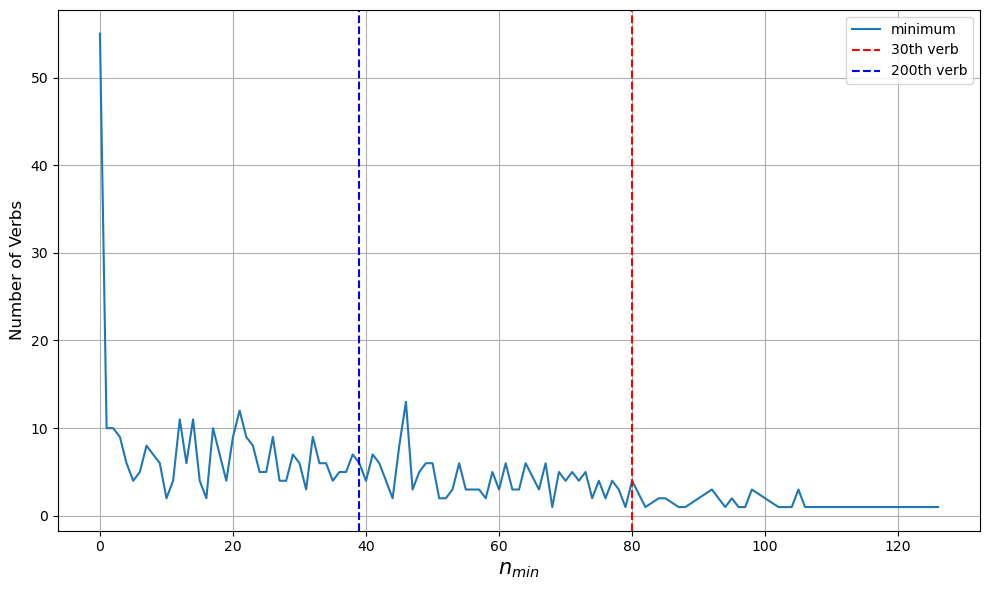

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/datasets/imSitu/metadata/count_gender.csv')

# Count the number of samples for each unique minimum count
min_count_counts = df['minimum'].value_counts().sort_index()

# Identify the 30th and 200th verbs with the highest min_count
sorted_min_counts = df['minimum'].sort_values(ascending=False).reset_index(drop=True)
thirtieth_value = sorted_min_counts[29]
two_hundredth_value = sorted_min_counts[199]

# Plot
plt.figure(figsize=(10,6))
min_count_counts.plot(kind='line')
plt.axvline(x=thirtieth_value, color='r', linestyle='--', label='30th verb')
plt.axvline(x=two_hundredth_value, color='b', linestyle='--', label='200th verb')
plt.xlabel(r'$n_{min}$', fontsize=15)
plt.ylabel('Number of Verbs', fontsize=12)
# plt.title('Number of Samples for Each Minimum Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('results/plots/imSitu_min_count.png', dpi=300)
plt.show()



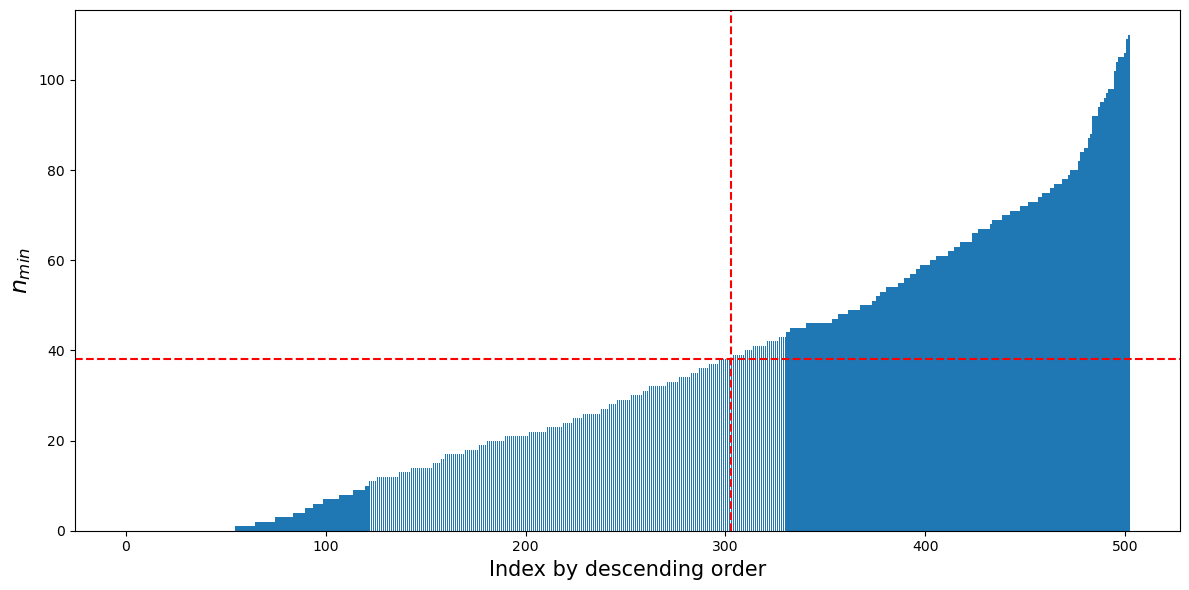

In [19]:
df = pd.read_csv('data/datasets/imSitu/metadata/count_gender.csv')
df = df.iloc[1:] # Removing the person entry
data = df['minimum'].sort_values().tolist()

plt.figure(figsize=(12, 6))
plt.bar(range(len(data)), data)
# plt.title('Distribution of Data')
plt.axvline(x=len(data) - 200, color='red', linestyle='--', label='200th verb')
plt.axhline(y=data[-200], color='red', linestyle='--', label='200th verb')
plt.xlabel('Index by descending order', fontsize=15)
plt.ylabel(r'$n_{min}$', fontsize=17)
plt.tight_layout()
plt.savefig('results/plots/imSitu_min_count.png', dpi=300)
plt.show()

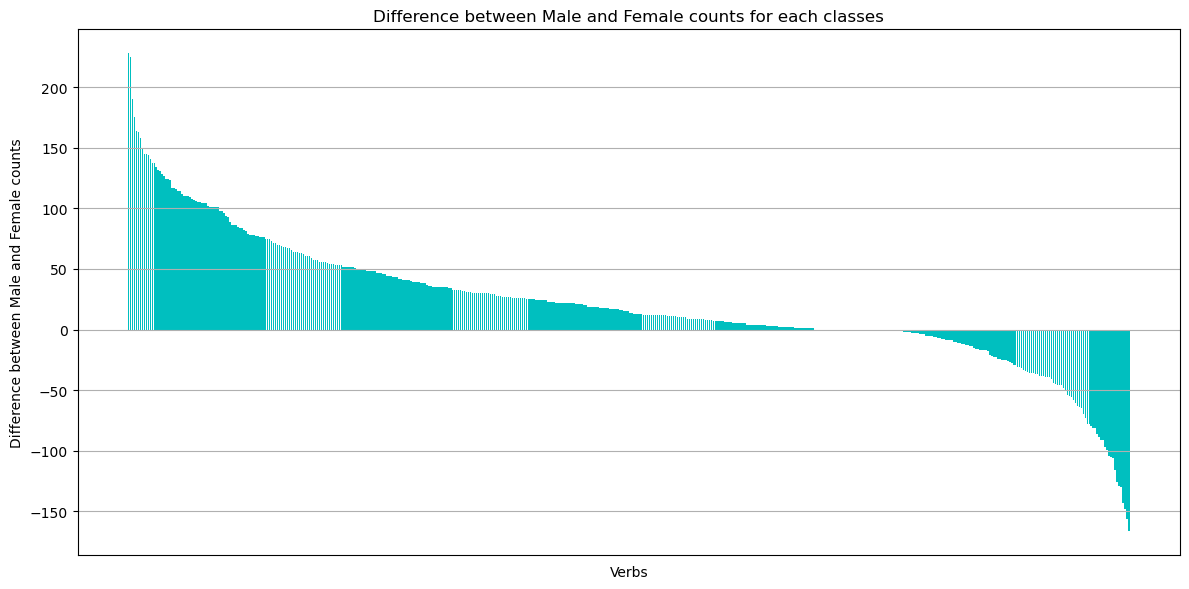

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataframe as 'df'

# Calculate the difference between male and female counts
df['difference'] = df['male'] - df['female']

# Sorting the dataframe by difference column in descending order
df_sorted = df.sort_values(by='difference', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['class_name'], df_sorted['difference'], color='c')
plt.xlabel('Verbs')
plt.ylabel('Difference between Male and Female counts')
plt.title('Difference between Male and Female counts for each classes')
plt.xticks([])  # This will remove the verb names from the x-axis to declutter the plot
plt.tight_layout()
plt.grid(axis='y')

# Saving the plot
plt.savefig('results/plots/imsitu_gender_count_difference.png', dpi=300)
plt.show()

In [28]:
df
df.iloc[1:]

,Unnamed: 0,num_images,num_males,num_females,cooccuring,min_num_gender
1,chair,4109,2483,1626,"[('dining table', 1426), ('cup', 927), ('bottl...",1626
2,car,3346,2454,892,"[('truck', 814), ('handbag', 659), ('traffic l...",892
3,tennis racket,2926,1775,1151,"[('sports ball', 1566), ('chair', 616), ('benc...",1151
4,handbag,2871,1258,1613,"[('car', 659), ('backpack', 591), ('cell phone...",1258
5,skateboard,2754,2672,82,"[('car', 497), ('bench', 276), ('backpack', 22...",82
...,...,...,...,...,...,...
70,sheep,180,134,46,"[('dog', 36), ('handbag', 18), ('horse', 18), ...",46
71,airplane,179,152,27,"[('truck', 41), ('handbag', 23), ('suitcase', ...",27
72,giraffe,178,81,97,"[('handbag', 33), ('backpack', 16), ('bench', ...",81
73,parking meter,128,85,43,"[('car', 88), ('handbag', 41), ('truck', 31), ...",43


## MSCoco

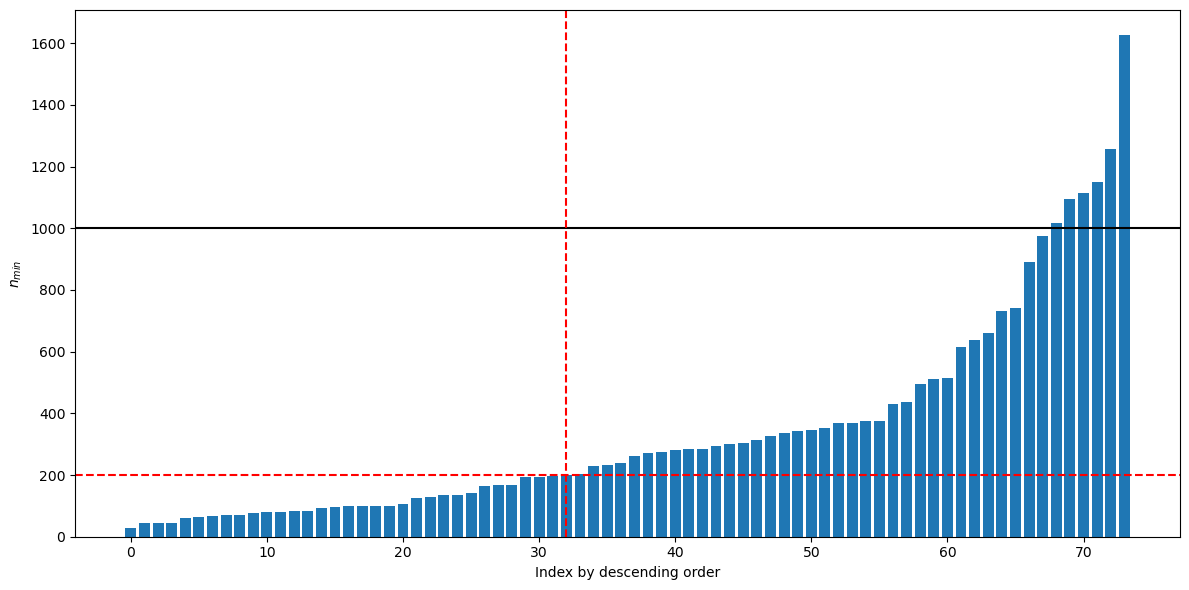

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/datasets/ms-coco/mscoco_gender_stats.csv')
df = df.iloc[1:] # Removing the person entry
data = df['min_num_gender'].sort_values().tolist()

plt.figure(figsize=(12, 6))
plt.bar(range(len(data)), data)
# plt.title('Distribution of Data')
plt.axhline(y=1000, color='black', linestyle='-', label='1000th value')
plt.axhline(y=201, color='red', linestyle='--', label='42th verb')
plt.axvline(x=len(data) - 42, color='red', linestyle='--', label='42th verb')
plt.xlabel('Index by descending order')
plt.ylabel(r'$n_{min}$')
plt.tight_layout()
plt.savefig('results/plots/mscoco_gender_count.png', dpi=300)
plt.show()

In [38]:
df

,Unnamed: 0,num_images,num_males,num_females,cooccuring,min_num_gender
1,chair,4109,2483,1626,"[('dining table', 1426), ('cup', 927), ('bottl...",1626
2,car,3346,2454,892,"[('truck', 814), ('handbag', 659), ('traffic l...",892
3,tennis racket,2926,1775,1151,"[('sports ball', 1566), ('chair', 616), ('benc...",1151
4,handbag,2871,1258,1613,"[('car', 659), ('backpack', 591), ('cell phone...",1258
5,skateboard,2754,2672,82,"[('car', 497), ('bench', 276), ('backpack', 22...",82
...,...,...,...,...,...,...
70,sheep,180,134,46,"[('dog', 36), ('handbag', 18), ('horse', 18), ...",46
71,airplane,179,152,27,"[('truck', 41), ('handbag', 23), ('suitcase', ...",27
72,giraffe,178,81,97,"[('handbag', 33), ('backpack', 16), ('bench', ...",81
73,parking meter,128,85,43,"[('car', 88), ('handbag', 41), ('truck', 31), ...",43


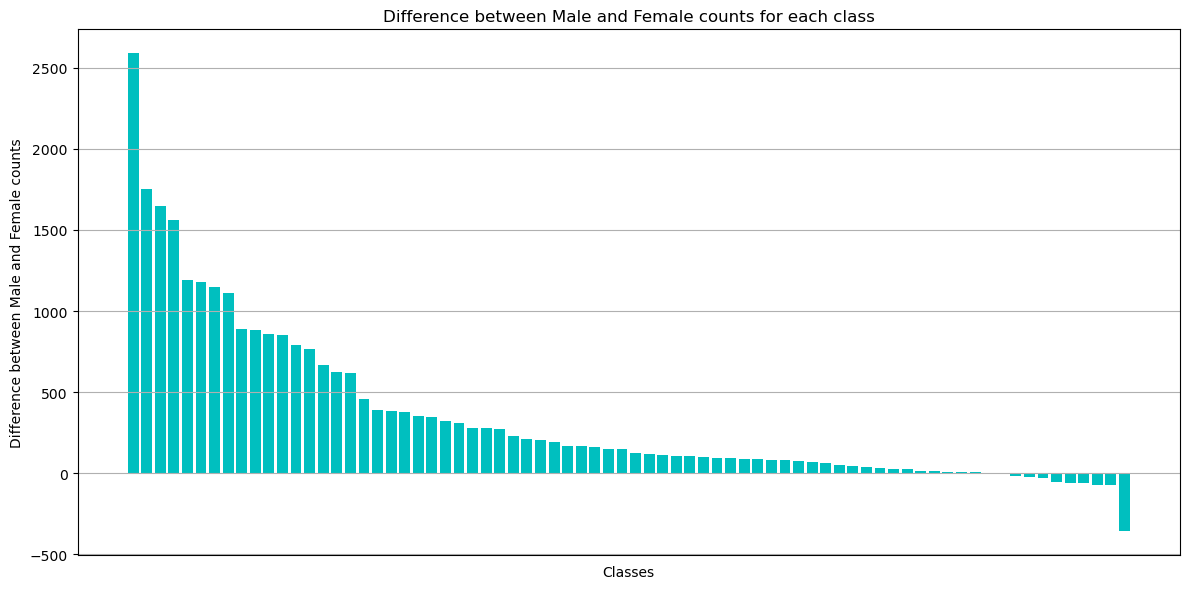

In [41]:
# Assuming you've already loaded your dataframe as 'df'

# Calculate the difference between male and female counts
df['difference'] = df['num_males'] - df['num_females']

# Sorting the dataframe by difference column in descending order
df_sorted = df.sort_values(by='difference', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Unnamed: 0'], df_sorted['difference'], color='c')
plt.xlabel('Classes')
plt.ylabel('Difference between Male and Female counts')
plt.title('Difference between Male and Female counts for each class')
plt.xticks([])  # This will remove the verb names from the x-axis to declutter the plot
plt.tight_layout()
plt.grid(axis='y')

# Saving the plot
plt.savefig('results/plots/mscoco_gender_count_difference.png', dpi=300)
plt.show()